# 📈 Regression problems

Linear Regression is a method used to define a relationship between a dependent variable $(Y)$ and independent variable $(X)$. Which is simply written as :

<center><img src="https://miro.medium.com/max/722/1*nejpuvlh1MbMGQtve_1ztQ.png"></center>

Where $y$ is the dependent variable, $m$ is the scale factor or coefficient, $b$ being the **bias coefficient** and $X$ being the independent variable. The bias coefficient gives an extra degree of freedom to this model. The goal is to draw the line of best fit between $X$ and $Y$ which estimates the relationship between $X$ and $Y$.

where:

- $y$ is the value we're trying to predict

- $m$ is the slope of the line.

- $x$ is our input feature.

- $b$ is the y-intercept.

By convention in machine learning, you'll write the equation for a model slightly differently:

$$\hat{y} = b + w_1 x_1$$

where:

- $\hat{y}$ is the predicted label (a desired output)
- $b$ is the bias (the y-intercept), sometimes referred to as $w_0$ .
- $w_1$ is the weight of feature 1. Weight is the same concept as the "slope" $m$ in the traditional equation of a line.
- $x_1$ is a feature (a known input).

In a more formal way, we note call that equation the hypothesis function :

- $$\hat{y} = h_{\theta}(X) = \theta_{0} + \theta_{1}x_{1}$$ 

$X$ could be a vector of $n$ features, such as  :

$$ h_{\theta}(X) = \sum_{j=0}^n \theta_{j}x_{j} \\$$ 

$$
\theta_{j}=\left[\begin{array}{c}
\theta_{0} \\
\vdots \\\\
\theta_{n} \\
\end{array}\right]
$$

In the case of **Simple Regression**, we have a parameters vector $\theta_{j}$ such as :


$$
 \theta_{j}=\left[
\begin{array}{c}
\theta_{0} \\
\theta_{1} \\
\end{array}\right]$$

<h4  style="font-family: Arial; font-size:1.4em;color:gold;">But how do we find these parameters' coefficients ? </h4>

We can find these using different approaches. 

The goal is to choose $\theta$ such as $h_{\theta}(X) \approx y$ for training set.

This is usually done by the **Least Mean Square** Method approach and the Gradient Descent approach.

 We will be implementing the Ordinary Least Mean Square Method.


## The Mean Square Error

The mean Square Error is also called a loss function.

The linear regression models we'll examine here use a loss function called squared loss (also known as $L_2$ loss). The squared loss for a single example is as follows:

```
cost  = the square of the difference between the label and the prediction
cost  = (observation - prediction(x))²
cost  = (y - y')²
```


Mean square error (MSE) is the average squared loss per example over the whole dataset. 

To calculate MSE, sum up all the squared losses for individual examples and then divide by the number of examples:

$$MSE = \frac{1}N \sum_{(x,y) \in D}(y - prediction(x))^2$$

Where :

- $(x,y)$ ->  $x$ being set of features that the model used for predictions, $y$ is the example's label.
- $N$ : number of examples in dataset D

Although MSE is commonly-used in machine learning, it is neither the only practical loss function nor the best loss function for all circumstances.

In [29]:
def mean_squared_error(y_true,y_hat):
  loss = y_hat - y_true
  return np.sum(loss ** 2) / (2 * len(y_true))

In order to get $\theta$ such as $h_{\theta}(X) \approx y$, we need to get the smallest MSE value, which is equivalent to finding the minimum of the loss function.

We can define that loss function as : 

$$ J(\theta) =  \frac{1}{2m} \sum_{i=0}^m(h_{\theta}(X^{(i)}) - y^{(i)}) ^2$$

## Reducing Loss

To train a model, we need a good way to reduce the model’s loss. An iterative approach is one widely used method for reducing loss, and is as easy and efficient as walking down a hill.

<center><img src="https://developers.google.com/machine-learning/crash-course/images/GradientDescentDiagram.svg" width=850></center>

Reducing Loss is made using the **Gradient Descent** algorithm.

# What is in the world Gradient ? 

Before jumping into code one more thing has to be explained — what is a gradient. Intuitively it is a slope of a curve at a given point in a specified direction.

In the case of a univariate function, it is simply the first derivative at a selected point. In the case of a multivariate function, it is a vector of derivatives in each main direction (along variable axes). Because we are interested only in a slope along one axis and we don’t care about others these derivatives are called partial derivatives.
A gradient for an $n$-dimensional function $f(x)$ at a given point p is defined as follows:



$$
\nabla f(p)=\left[\begin{array}{c}
\dfrac{\partial f}{\partial x_1}(p)\\\\\
\dfrac{\partial f}{\partial x_2}(p) \\\\\
\vdots \\\\
\dfrac{\partial f}{\partial x_n}(p) 
\end{array}\right]
$$

Let's consider the function bellow :
$$
f(x,y) = 0.5x^2 + y^2
$$

In [30]:
import numpy as np

In [31]:
def f(x,y):
  return 0.5*x**2 + y**2

In [32]:
import matplotlib.pyplot as plt

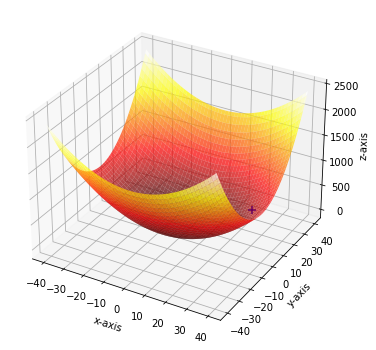

In [33]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure(figsize=(6,15))
ax = fig.gca(projection='3d')   # Create the axes

# Data
X = np.linspace(-40, 40, 100)
Y = np.linspace(-40, 40, 100)
X, Y = np.meshgrid(X, Y)
Z = f(X,Y)

# Plot the 3d surface

surface = ax.plot_surface(X, Y, Z,                  
                          rstride = 2,
                          cstride = 2,
                          alpha = .7,
                          cmap=cm.hot, 
                          linewidth=0, 
                          antialiased=True)

ax.scatter(30,10,f(30,10), marker='+', zorder=10, c="b",s=50)


# Set some labels
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
plt.show()

Let’s assume we are interested in a gradient at point p(10,10):

$$
\dfrac{\partial f}{\partial x}(x,y)=x \\\\\\\\\\\
\\\\\

\dfrac{\partial f}{\partial y}(x,y)=2y\\

$$


$$
\nabla f(x,y)=\left[\begin{array}{c}
\dfrac{\partial f}{\partial x_1}(p) \\\\

\dfrac{\partial f}{\partial x_2}(p) 
\end{array}\right]
$$



so consequently:

$$\nabla f(x,y)=\left[\begin{array}{c}
 x \\
 2y \\

\end{array}\right]

\\\\\\
$$



$$
 \nabla f(10,10)=\left[
\begin{array}{c}
10 \\
20 \\
\end{array}\right]$$

By looking at these values we conclude that the slope is twice steeper along the y axis.


## Gradient Descent

Gradient Descent Algorithm iteratively calculates the next point using gradient at the current position, then scales it (by a learning rate) and subtracts obtained value from the current position (makes a step).

It subtracts the value because we want to minimise the function (to maximise it would be adding). 
 
In our case,the function we would like to minimize and very frequently will be Mean Squared Errors function.
This process can be written as:

$$ \theta_{j} := \theta_{j} - \alpha\dfrac{\partial f}{\partial \theta}J(\theta_{0},\theta_{1}) $$ 

 There’s an important parameter $\alpha$ which scales the gradient and thus controls the step size. 

In machine learning, it is called **learning rate** and have a strong influence on performance.

- The smaller learning rate the longer GD converges, or may reach maximum iteration before reaching the optimum point

- If learning rate is too big the algorithm may not converge to the optimal point (jump around) or even to diverge completely.

# Hide

In this notebook, we would like to predict the benefice of a firm in different towns by focusing on these towns' inhabitants.

To do so, we will study the case of a set of given data with :
- $y$ being the benefice,
- $X$ inhabitants features.

We'll be using **Gradient Descent** method for prediction.

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [25]:
df_houses = pd.read_csv('data/houses.csv')

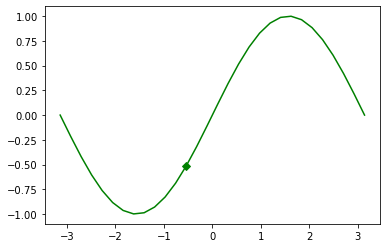

In [26]:
xs = np.linspace(-np.pi, np.pi, 30)
ys = np.sin(xs)
markers_on = [12]
plt.plot(xs, ys, '-gD', markevery=markers_on)

In [5]:
data = np.genfromtxt('data/houses.csv', delimiter=',', dtype=int)
data.shape

(98, 2)

In [6]:
# rajoutons l'ordonnée à l'origine theta 0
intercept=np.ones((data.shape[0],1))
X=np.column_stack((intercept,data[:,0]))
y = data[:, 1]

In [ ]:
X

Text(0, 0.5, 'Bénéfice x1000')

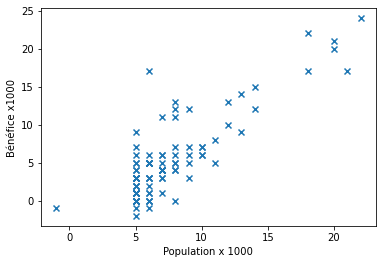

In [8]:
# traçons ces données pour visualisation
plt.scatter(X[:,1],y,marker ='x')
plt.xlabel('Population x 1000')
plt.ylabel('Bénéfice x1000')

1- Calcul du coût

Cette fonction servira à calculer le cout $J(\theta_0,\theta_1)$

Elle prendra l'ensemble de données d'apprentissage en entrée ainsi que les paramètres définis initialement

In [9]:
def computeCostNonVect(X, y, theta):
    # idéalement, tracer le coût à chaque itération pour s'assurer que la descente du gradient est correcte
    
    # calculer le coût avec et sans vectorisation, 
    # comparer le temps de traitement
    pass
    

In [10]:
def computeCost(X, y, theta):
    # idéalement, tracer le coût à chaque itération pour s'assurer que la descente du gradient est correcte
    
    # calculer le coût avec et sans vectorisation, 
    # comparer le temps de traitement
    pass

In [28]:
def get_cost(Y,Y_hat):
    Y_resd=Y-Y_hat
    return np.sum(np.dot(Y_resd.T,Y_resd))/len(Y-Y_resd)

2- Fonction de la descente du gradient

Cette fonction mettra à jour les paramètres $\theta_0,\theta_1$ jusqu'à convergence: atteinte du nombre d'itérations max, ou dérivée assez petite.

In [11]:
def gradientDescent(X, y, theta, alpha, iterations):
    # garder aussi le cout à chaque itération 
    # pour afficher le coût en fonction de theta0 et theta1
    pass

# Descente du Gradient : Appel des fonctions

Initialisation de $\theta_0$ et $\theta_1$

In [12]:
theta = np.zeros((2, 1))

Calculer le cout initial

In [13]:
initialCost=computeCost(X, y, theta)

Appel des la fonction de calcul du gradient

In [14]:
# paramètres
iterations = 1500;
alpha = 0.01;
# Appel
theta = gradientDescent(X, y, theta, alpha, iterations);

Traçage de la fonction du coût

Notons que $\theta^T  x$ est équivalent à $X  \theta $ où $X= \begin{pmatrix}
..(x^{(1)})^T..\\
..(x^{(2)})^T..\\
.\\
.\\
.\\
..(x^{(m)})^T..
\end{pmatrix} $

In [15]:
y_pred=np.matmul(X,theta)
plt.scatter(X[:,1],y,marker ='x')
plt.xlabel('Population x 1000')
plt.ylabel('Chiffre d\'affaires x1000')
plt.plot(X,y_pred)
# la ligne du graphe represente le traçage de la fonction hypothèse
# la ligne devrait se rapprocher des données après entrainement avec la descente du gredient

ValueError: matmul: Input operand 1 does not have enough dimensions (has 0, gufunc core with signature (n?,k),(k,m?)->(n?,m?) requires 1)

Traçage du coût en fonction de theta0 et theta1

Prédire des valeurs de y

In [ ]:
# Predire pour une opulation = 35,000 et 70,000
predict1 = np.matmul([1, 3.5],theta);
predict1

In [ ]:
predict2 = np.matmul([1, 7],theta);
predict2

# Régression linéaire à plusieurs variables

Proposer, l'aide des fonctions définies precedemment, une regression linéaire lorsque le nombre de descripeurs est supérieur à 1, en utilisant la base d'apprentissage suivante

In [ ]:
df_houses = pd.read_csv('data/house_multi.csv')

In [ ]:
# données
dataMulti = np.genfromtxt('dataMulti.csv', delimiter=',', dtype=int)
dataMulti.shape

Pour cette ensemble de données, nous voudrions prédire le prix d'une maison (3ème colonne de dataMulti) à partir de :
- sa supérficie (1ère colonne)
- son nombre de chambres (2ème colonne)

In [ ]:
# d'abord créer X et y


In [ ]:
# redéfinissez vos fonctions de coût si cela est necessaire


Mise à l'échelle des données

Normalisation des données en moyenne = 0

Appliquer la descente du gradient à plusieurs variables

Comparer la descente du gradient avec et sans normalisation
- **Exemple**: voir la difference dans le temps de calcul

# Vérification de l'implementation
Comparer vos algorithmes à ceux de scikitlearn

# Renforcement d'apprentissage
Mettre ici toute idée qui pourrait renforcer votre apprentissage

Ressources :

1. https://towardsdatascience.com/complete-step-by-step-gradient-descent-algorithm-from-scratch-acba013e8420